<a href="https://colab.research.google.com/github/Maureen36Mathenge/Determine-survival-rates-on-the-Titanic-dataset-/blob/master/Moringa_Week_9_IP_%22Predicting_the_survival_chances%22_Maureen_Mathenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Defining the Question


##a)Specifying the Data Analytic Question

##b)Defining the Metric for Success

##c)Understanding the context

##d)Recording the Experimental Design

#Feature Description

pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
survival        Survival
                (0 = No; 1 = Yes)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)
\

#Import Libraries

In [0]:
import pandas as pd 
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [131]:
#Upload the dataset
df = pd.read_csv("train (5).csv")
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#Reading the data

In [132]:
# creating a list of dataframe columns 
clmn = list(df) 
  
for i in clmn: 
    # printing a third element of column 
    print(df[i].unique()) 

  #This are the features i will work with

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [133]:
#check the data types for all the variables 
df.dtypes

#Survived,Pclass SibSp,Parch have the dataset integer
#Sex and Embarked are strings
#Age is a float     

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [0]:
#Label encode every column that is categorical
df['Sex'].replace(['male', 'female'],[1,0],inplace=True)
df['Embarked'].replace(['S', 'C','Q'],[0,1,2],inplace=True)

#Its neccesary for modelling

In [135]:
#Check if the label encoding is working 
df.sample(10)

#The label encodind has worked 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
511,512,0,3,"Webber, Mr. James",1,NaN,0,0,SOTON/OQ 3101316,8.0500,NaN,0.0
568,569,0,3,"Doharr, Mr. Tannous",1,NaN,0,0,2686,7.2292,NaN,1.0
758,759,0,3,"Theobald, Mr. Thomas Leonard",1,34.0,0,0,363294,8.0500,NaN,0.0
533,534,1,3,"Peter, Mrs. Catherine (Catherine Rizk)",0,NaN,0,2,2668,22.3583,NaN,1.0
178,179,0,2,"Hale, Mr. Reginald",1,30.0,0,0,250653,13.0000,NaN,0.0
497,498,0,3,"Shellard, Mr. Frederick William",1,NaN,0,0,C.A. 6212,15.1000,NaN,0.0
331,332,0,1,"Partner, Mr. Austen",1,45.5,0,0,113043,28.5000,C124,0.0
312,313,0,2,"Lahtinen, Mrs. William (Anna Sylfven)",0,26.0,1,1,250651,26.0000,NaN,0.0
255,256,1,3,"Touma, Mrs. Darwis (Hanne Youssef Razi)",0,29.0,0,2,2650,15.2458,NaN,1.0
762,763,1,3,"Barah, Mr. Hanna Assi",1,20.0,0,0,2663,7.2292,NaN,1.0


In [136]:
df.shape
#We have 891 rows and 8 columns to work with 

(891, 12)

#Data Preparation

##1)Validity

In [137]:
#Get columns that only numerical
#This is neccesary since boxplots do not work for categorical data
df_num = df.select_dtypes(include = ['float64','int64'])
df_num.head()
#Perfect!

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,0.0
1,2,1,1,0,38.0,1,0,71.2833,1.0
2,3,1,3,0,26.0,0,0,7.9250,0.0
3,4,1,1,0,35.0,1,0,53.1000,0.0
4,5,0,3,1,35.0,0,0,8.0500,0.0


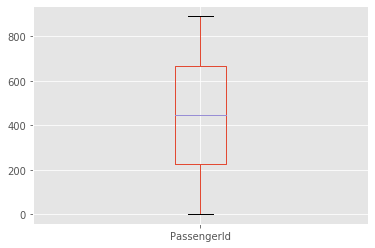

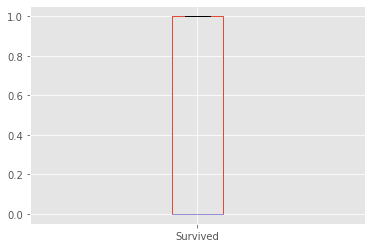

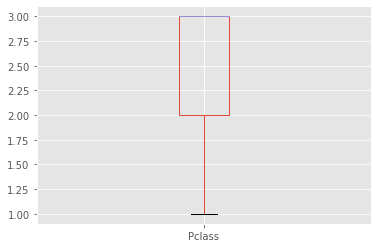

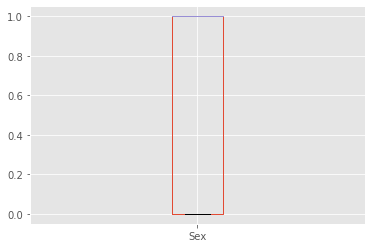

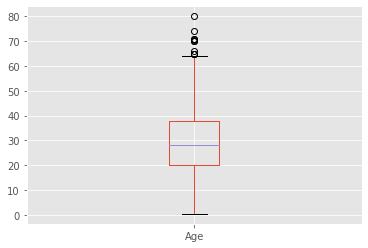

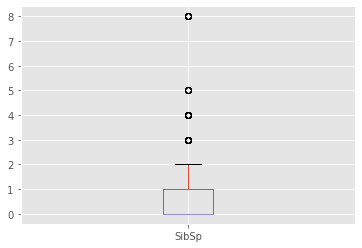

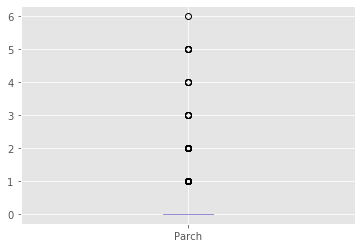

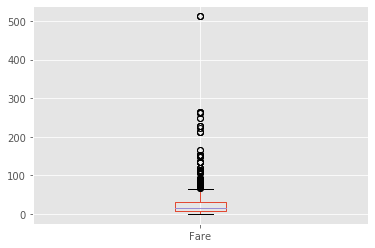

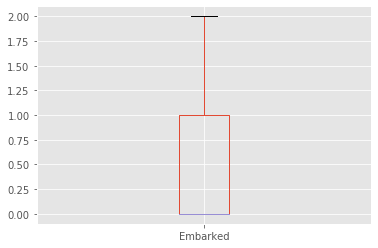

In [138]:
#Check for OUTLIERS 
for column in df_num:
    plt.figure()
    df_num.boxplot([column])

##2)Completeness

In [139]:
#Check for pesence of m issing values
df.isnull().sum()

#The column age has 177 missing values 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [140]:
#Filling the null values 
#Since our aim is to create a KNN model we need to fill null values
df = df.fillna(df.mean())
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

##3)Consistency

In [141]:
#check for duplicates from the dataset
df.duplicated().sum()

0

#Exploratory Data Analysis

##Univariate Analysis

###Measures of Central Tendency

In [142]:

df.describe(include="all")


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891.000000,891.000000,891.000000,891.000000,891,891.000000,204,891.000000
unique,NaN,NaN,NaN,891,NaN,NaN,NaN,NaN,681,NaN,147,NaN
top,NaN,NaN,NaN,"Foreman, Mr. Benjamin Laventall",NaN,NaN,NaN,NaN,1601,NaN,G6,NaN
freq,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,7,NaN,4,NaN
mean,446.000000,0.383838,2.308642,NaN,0.647587,29.699118,0.523008,0.381594,NaN,32.204208,NaN,0.362205
std,257.353842,0.486592,0.836071,NaN,0.477990,13.002015,1.102743,0.806057,NaN,49.693429,NaN,0.635442
min,1.000000,0.000000,1.000000,NaN,0.000000,0.420000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,22.000000,0.000000,0.000000,NaN,7.910400,NaN,0.000000
50%,446.000000,0.000000,3.000000,NaN,1.000000,29.699118,0.000000,0.000000,NaN,14.454200,NaN,0.000000
75%,668.500000,1.000000,3.000000,NaN,1.000000,35.000000,1.000000,0.000000,NaN,31.000000,NaN,1.000000


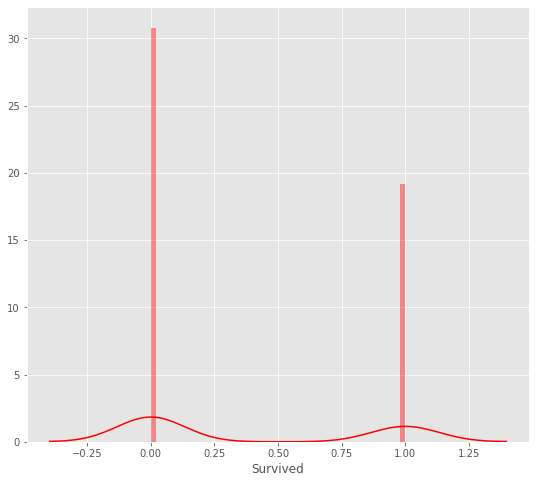

In [143]:
plt.figure(figsize=(9, 8))
sns.distplot(df['Survived'], color='r', bins=50, hist_kws={'alpha': 0.4});

Majority of the people that had boarded did not survive 

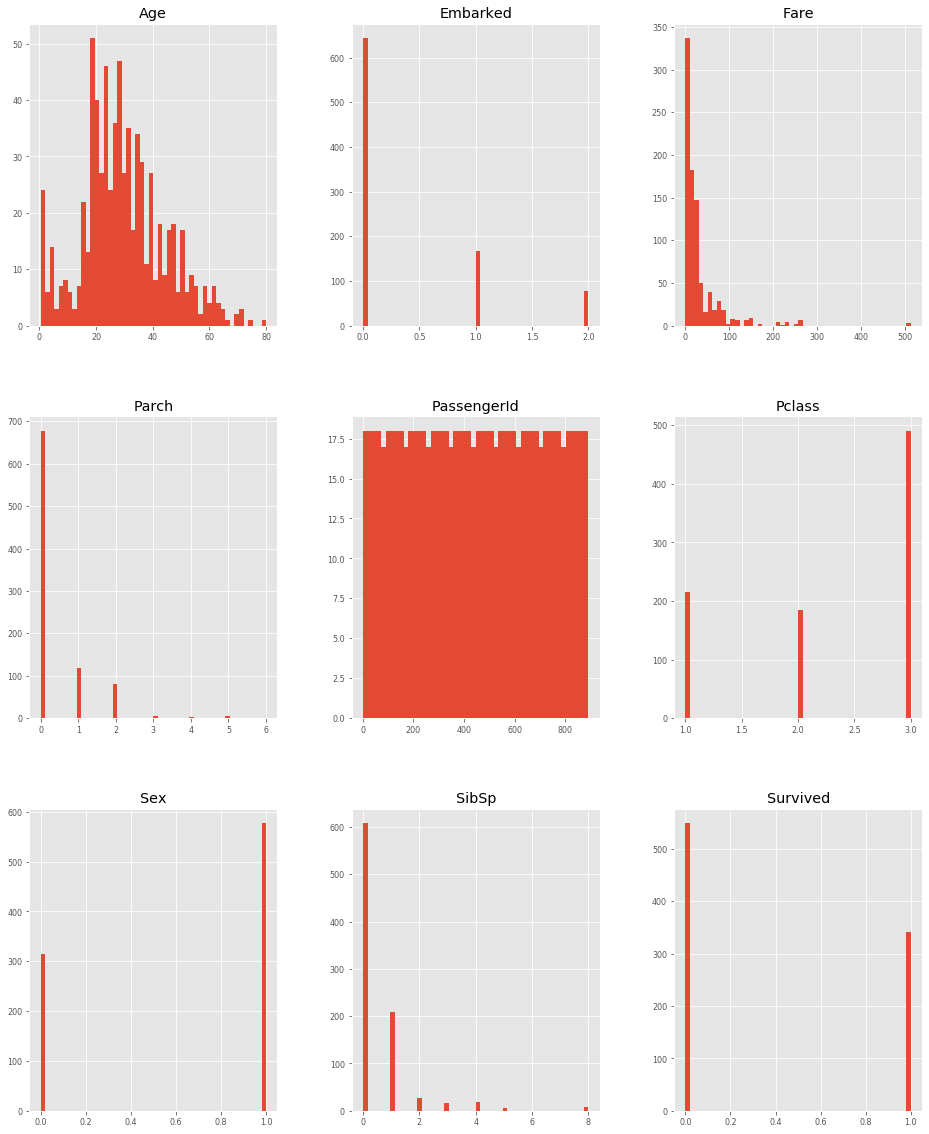

In [144]:
#We can now plot the histograms
#print(df_num["Age"].max())
df_num.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

Majority of the people were aged between 18 - 40


Text(0.5, 1.0, 'People that did not Survive')

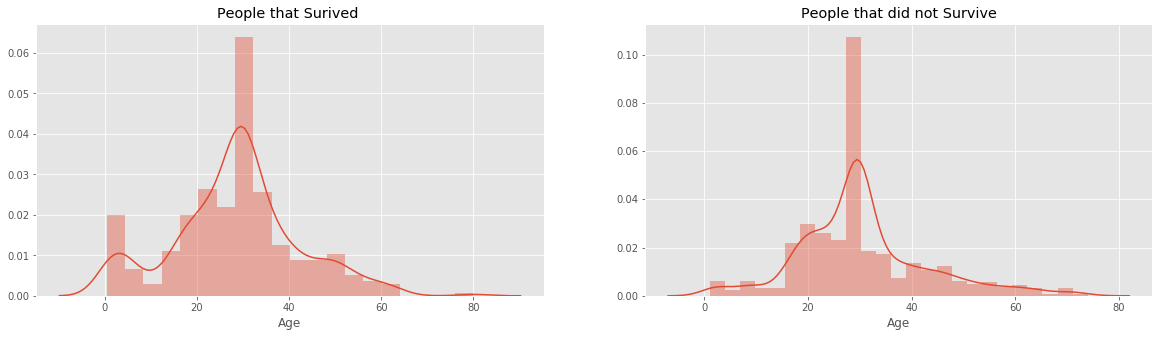

In [159]:
#Checking the missin the people that survived based on their age 
f,ax=plt.subplots(1,2,figsize=(20,5))
sns.distplot(df[df['Survived']==1].Age,ax=ax[0])
ax[0].set_title('People that Surived ')
sns.distplot(df[df['Survived']==0].Age,ax=ax[1])
ax[1].set_title('People that did not Survive')

#Mo


##K-Nearest Neighbour (KNN)

###Baseline Model

In [0]:
#Create your dependent and independent variable 
y = df[["Survived"]]
X = df.drop(["Survived","PassengerId","Name","Ticket","Fare","Cabin"],axis=1)

#I went ahead and dropped the columns above since they really do not attribute to i knowing if the passangers survived of not 
#When doing the visualization the columns we are left with compensate for the dropped ones 

In [0]:
#Split the data into test set and training set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =25)

In [0]:
#Feature Scale the data
scaler = StandardScaler()
scaler.fit(X_train)

_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#We shall normalise the data within a particular range
#Sometimes, it also helps in speeding up the calculations in an algorithm.

In [150]:
 from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)

classifier.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform')

In [0]:
#Predict the model that we have created 
#We use the test to predict
y_pred = classifier.predict(X_test)

In [152]:
#Evaluate the model
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  1 111]
 [  0  67]]
              precision    recall  f1-score   support

           0       1.00      0.01      0.02       112
           1       0.38      1.00      0.55        67

    accuracy                           0.38       179
   macro avg       0.69      0.50      0.28       179
weighted avg       0.77      0.38      0.22       179



###Model 2

#1.Defining the Question

##a)Specifying the Data Analytic Question
I have obtained the UCI Machne Learning Repository
They would like to predict whether a message is a spam or not 
This is based of the data they have collected from their postmaster and individuals ,filed work and personal e-mails.


##b)Defining the Metric for Success
They need us to predict if a message is either a spam or not and create an accurate model to do the prediction  

##c)Understanding the context


#d)Recording the Experimental Design
I shall follow the CRIPS dm to optimize my research 

In [66]:
#upload the dataset
df = pd.read_csv("spambase.data",header = None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [69]:
#Get what every column is and impute it in the above dataset
df.columns = ['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our',
'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail',
'word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses',
'word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your',
'word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george',
'word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data',
'word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm',
'word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project',
'word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(',
'char_freq_[','char_freq_exclamation','char_freq_dollar','char_freq_hashtag','capital_run_length_average',
'capital_run_length_longest','capital_run_length_total','spam']

#View the dataset
df.head()


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_exclamation,char_freq_dollar,char_freq_hashtag,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


#Multinomial Naive Bayes Classifier

In [81]:
##Import Libraries 
import nltk
nltk.download('punkt') 
from sklearn.metrics import accuracy_score

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [0]:
#Our dataset is discrete
#Hence we will opt to use this method 
y = df[["spam"]]
X = df.drop(["spam"],axis=1)


In [0]:
#Train the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state =25)

In [77]:
# Fitting our model 
# initialize the Naive Bayes Classifier and fit the data. 
# 
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB().fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [0]:
# Evaluating the Model
# Once we have put together our classifier, we can evaluate its performance in the testing set
# 
predicted = model.predict(X_test)
#print(np.mean(predicted == y_test))

In [82]:
accuracy_score(predicted,y_test)

0.7904451682953312